In [1]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/szdDfF796xg", width=1920/4, height=1080/4)
#<iframe width="560" height="315" src="https://www.youtube.com/embed/szdDfF796xg" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [2]:
from _easy_qiskit_init import *

In [3]:
from qiskit.providers import fake_provider

In [4]:
from qiskit import pulse, qpy

In [5]:
with pulse.build() as schedule:
    pulse.play(pulse.Gaussian(160, 0.1, 40), pulse.DriveChannel(0))
with open('schedule.qpy', 'wb') as fd:
    qpy.dump(schedule, fd)

In [6]:
with open('schedule.qpy', 'rb') as fd:
    new_schedule = qpy.load(fd)[0]

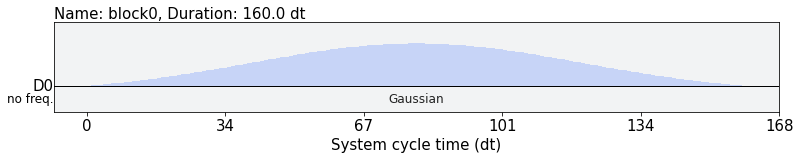

In [7]:
new_schedule.draw()

In [12]:
from qiskit.transpiler.passes import *
from qiskit.transpiler import PassManager, StagedPassManager
basis_gates = ['rx', 'ry', 'rxx']
init = PassManager([UnitarySynthesis(basis_gates, min_qubits=3), Unroll3qOrMore()])
translate = PassManager([Collect2qBlocks(),
                   ConsolidateBlocks(basis_gates=basis_gates),
                   UnitarySynthesis(basis_gates)])
staged_pm = StagedPassManager(stages=['init', 'translate'],
                              init=init, translate=translate)

In [13]:
staged_pm.stages

('init', 'translate')

In [16]:
from qiskit_toqm import toqm_latency, toqm_strategy, toqm_swap
# https://github.com/Qiskit/qiskit-terra/pull/7825

In [20]:
from qiskit_toqm import ToqmSwap, ToqmOptimalStrategy, latencies_from_simple
from qiskit.transpiler import CouplingMap

latencies = latencies_from_simple(one_qubit_cycles=1, two_qubit_cycles=2, swap_cycles=6)
strategy = ToqmOptimalStrategy(latencies, perform_layout=False)
#swap = ToqmSwap(coupling_map, strategy)

In [1]:
from qiskit.tools.jupyter import *
%qiskit_version_table